In [1]:
#Importing the required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [2]:
#Downloading the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

#Division of Data into Training and Testing
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
#The data in only in 2D and Convolution expects HxWxC
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [4]:
#Number of Classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
#Build the model using Functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5215 - accuracy: 0.8062 - val_loss: 0.4046 - val_accuracy: 0.8505
Epoch 2/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3611 - accuracy: 0.8649 - val_loss: 0.3350 - val_accuracy: 0.8761
Epoch 3/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3133 - accuracy: 0.8830 - val_loss: 0.3298 - val_accuracy: 0.8822
Epoch 4/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2809 - accuracy: 0.8943 - val_loss: 0.2980 - val_accuracy: 0.8887
Epoch 5/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2561 - accuracy: 0.9031 - val_loss: 0.2925 - val_accuracy: 0.8936
Epoch 6/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2351 - accuracy: 0.9107 - val_loss: 0.2991 - val_accuracy: 0.8947
Epoch 7/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2175 - accuracy: 0.9176 - val_loss: 0.2977 -

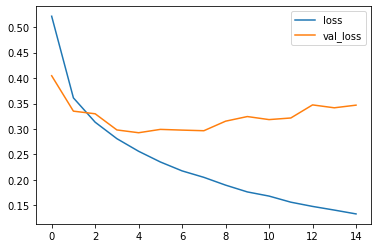

In [7]:
#Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

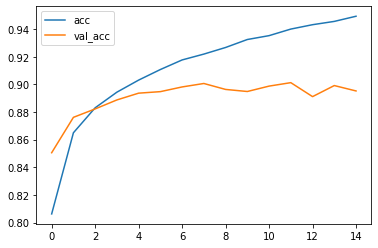

In [8]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

Confusion Matrix, without Normalization
[[819   2  26  22   4   1 122   0   4   0]
 [  2 974   1  13   2   0   6   0   2   0]
 [ 12   0 804  13  70   0  99   0   2   0]
 [ 13   2  21 911  34   0  19   0   0   0]
 [  0   0  28  23 866   0  79   0   4   0]
 [  0   0   0   0   0 975   0   8   2  15]
 [103   2  48  20  95   1 719   0  12   0]
 [  0   0   0   0   0  23   0 951   0  26]
 [  0   1   4   6   7   1   9   3 968   1]
 [  1   0   0   0   0   6   0  28   0 965]]


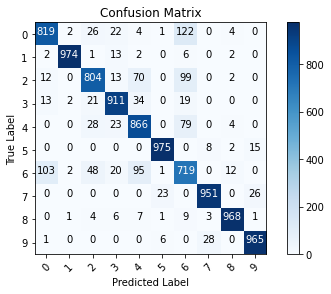

In [9]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize= False, title='Confusion Matrix', cmap=plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix, without Normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [12]:
labels = ''' T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

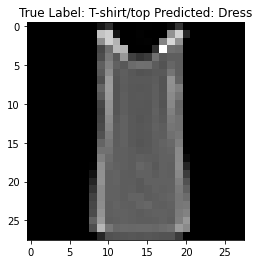

In [15]:
#Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title('True Label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));